# Dragon Real Estate - Price Predictor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading the data

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
print(housing.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PATRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [4]:
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PATRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296      15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242      17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242      17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222      18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222      18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        502 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PATRATIO  506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  502.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284679   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.704057   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.209000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX    PATRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [7]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [8]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [9]:
housing.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  502.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284679   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.704057   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.209000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX    PATRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [10]:
housing.CHAS

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [11]:
housing.AGE.value_counts()

100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
58.4      1
74.4      1
73.4      1
33.1      1
89.3      1
Name: AGE, Length: 356, dtype: int64

# Taking a look at frequency of all housing.columns in the dataframe

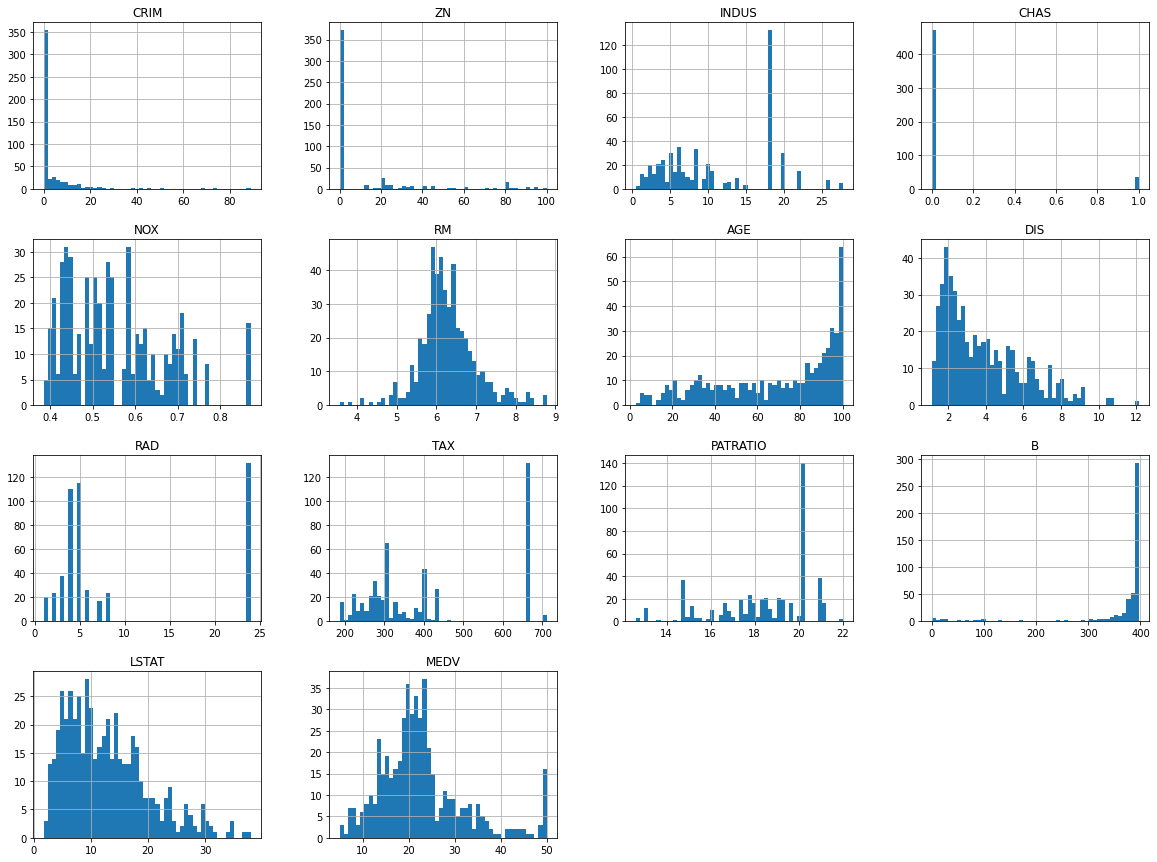

In [12]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

# Train test splitting

In [13]:
def split_train_test(data,test_ratio):
    np.random.seed(42)
    
    # np.random.permutation(10)
    # array([1, 7, 4, 3, 0, 9, 2, 5, 8, 6])
    
    # Here, shuffled (It is a np.array) will store the permuted row number of the dataframe(data) 
    shuffled = np.random.permutation(len(data))
    
    test_set_size = int(len(data) * test_ratio)
    
    # We can take 0 to test_set_size for testing and rest are for training
    test_indices = shuffled[:test_set_size]
    
    train_indices = shuffled[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices ]

In [14]:
train_set, test_set = split_train_test(housing, 0.2)

In [15]:
print(f"Rows in train set is : {len(train_set)}.\nRows in test set is : {len(test_set)}")

Rows in train set is : 405.
Rows in test set is : 101


# With sklearn (This is better and easy)

In [16]:
# sklearn me kuch function likhne ki jarurat nahi padti, isme 1 function(1 line) se hi saare splitting ho jaate hai
# Hence, split_train_test() function defined above is of no use to us now
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size=0.2, random_state=42)
print(f"Rows in train set is : {len(train_set)}.\nRows in test set is : {len(test_set)}")

Rows in train set is : 404.
Rows in test set is : 102


In [17]:
'''But the problem with sklearn is that what if only 1 type of data(a column that is very important) is given in training set .
Example of :: If alien reaches earth he sees only indian people and he runs is ml model with that , if american blonde comes , he doesn't recognizes it at all
Solution of this is done with sklearn with some stratified sampling'''

"But the problem with sklearn is that what if only 1 type of data(a column that is very important) is given in training set .\nExample of :: If alien reaches earth he sees only indian people and he runs is ml model with that , if american blonde comes , he doesn't recognizes it at all\nSolution of this is done with sklearn with some stratified sampling"

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    # print(train_index) -> prints an np.array  
    # print(test_index) -> prints an np.array
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [19]:
strat_test_set

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
342   0.02498   0.0   1.89     0  0.518  6.540   59.7  6.2669    1  422   
379  17.86670   0.0  18.10     0  0.671  6.223  100.0  1.3861   24  666   
223   0.61470   0.0   6.20     0  0.507  6.618   80.8  3.2721    8  307   
219   0.11425   0.0  13.89     1  0.550  6.373   92.4  3.3633    5  276   
48    0.25387   0.0   6.91     0  0.448  5.399   95.3  5.8700    3  233   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
88    0.05660   0.0   3.41     0  0.489  7.007   86.3  3.4217    2  270   
466   3.77498   0.0  18.10     0  0.655  5.952   84.7  2.8715   24  666   
52    0.05360  21.0   5.64     0  0.439  6.511   21.1  6.8147    4  243   
121   0.07165   0.0  25.65     0  0.581  6.004   84.1  2.1974    2  188   
218   0.11069   0.0  13.89     1  0.550  5.951   93.8  2.8893    5  276   

     PATRATIO       B  LSTAT  MEDV  
342      15.9  389.96   8.65  16.5  
379      20.2  393.74  21.78  10.2  
223      17.4  396.90   7.60  30.1  
219      16.4  393.74  10.50  23.0  
48       17.9  396.90  30.81  14.4  
..        ...     ...    ...   ...  
88       17.8  396.90   5.50  23.6  
466      20.2   22.01  17.15  19.0  
52       16.8  396.90   5.28  25.0  
121      19.1  377.67  14.27  20.3  
218      16.4  396.90  17.92  21.5  

[102 rows x 14 columns]

In [20]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      102 non-null    float64
 1   ZN        102 non-null    float64
 2   INDUS     102 non-null    float64
 3   CHAS      102 non-null    int64  
 4   NOX       102 non-null    float64
 5   RM        102 non-null    float64
 6   AGE       102 non-null    float64
 7   DIS       102 non-null    float64
 8   RAD       102 non-null    int64  
 9   TAX       102 non-null    int64  
 10  PATRATIO  102 non-null    float64
 11  B         102 non-null    float64
 12  LSTAT     102 non-null    float64
 13  MEDV      102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [21]:
strat_test_set.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean     3.655942   13.450980   10.312255    0.068627    0.541353    6.303353   
std     10.400966   27.503241    6.761154    0.254068    0.111397    0.662996   
min      0.009060    0.000000    0.460000    0.000000    0.385000    4.138000   
25%      0.057827    0.000000    4.950000    0.000000    0.448000    5.912750   
50%      0.176150    0.000000    7.760000    0.000000    0.515000    6.176000   
75%      2.061955    0.000000   18.100000    0.000000    0.612750    6.539500   
max     88.976200   90.000000   27.740000    1.000000    0.871000    8.725000   

              AGE         DIS         RAD         TAX    PATRATIO           B  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean    66.733333    3.988460    8.813725  391.980392   18.385294  369.670196   
std     27.772183    2.131247    8.614667  167.837379    2.310604   68.075774   
min      6.500000    1.137000    1.000000  188.000000   12.600000    3.650000   
25%     45.850000    2.223650    4.000000  270.000000   16.800000  377.685000   
50%     71.100000    3.422950    5.000000  307.000000   19.150000  393.740000   
75%     93.500000    5.609225    8.000000  461.000000   20.200000  396.900000   
max    100.000000   10.585700   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  102.000000  102.000000  
mean    12.104314   22.625490  
std      6.759257    8.452344  
min      2.470000    5.000000  
25%      7.480000   18.925000  
50%     10.565000   21.500000  
75%     16.267500   25.000000  
max     37.970000   50.000000

In [22]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [23]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [24]:
95/7

13.571428571428571

In [25]:
376/28

13.428571428571429

In [26]:
housing = strat_train_set.copy()

# Looking for correlations

In [27]:
corr_matrix = housing.corr()

In [28]:
print(corr_matrix)

              CRIM        ZN     INDUS      CHAS       NOX        RM  \
CRIM      1.000000 -0.212927  0.416640 -0.061482  0.430879 -0.258096   
ZN       -0.212927  1.000000 -0.542161 -0.023536 -0.509327  0.292197   
INDUS     0.416640 -0.542161  1.000000  0.043686  0.759051 -0.382350   
CHAS     -0.061482 -0.023536  0.043686  1.000000  0.077490  0.100351   
NOX       0.430879 -0.509327  0.759051  0.077490  1.000000 -0.299123   
RM       -0.258096  0.292197 -0.382350  0.100351 -0.299123  1.000000   
AGE       0.361890 -0.565680  0.644114  0.058388  0.727358 -0.242182   
DIS      -0.386900  0.666939 -0.708612 -0.088081 -0.763623  0.202085   
RAD       0.648221 -0.306480  0.580908 -0.023005  0.596012 -0.199415   
TAX       0.603934 -0.322803  0.716288 -0.048802  0.659049 -0.281893   
PATRATIO  0.305603 -0.390570  0.384465 -0.132682  0.164977 -0.330420   
B        -0.486869  0.188575 -0.368685  0.048275 -0.408434  0.122874   
LSTAT     0.471442 -0.420097  0.611068 -0.077592  0.602386 -0.60

In [29]:
print(corr_matrix['MEDV'])

CRIM       -0.393715
ZN          0.339741
INDUS      -0.473516
CHAS        0.205066
NOX        -0.422873
RM          0.679202
AGE        -0.364596
DIS         0.240451
RAD        -0.374693
TAX        -0.456657
PATRATIO   -0.493534
B           0.361761
LSTAT      -0.740494
MEDV        1.000000
Name: MEDV, dtype: float64


In [30]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV        1.000000
RM          0.679202
B           0.361761
ZN          0.339741
DIS         0.240451
CHAS        0.205066
AGE        -0.364596
RAD        -0.374693
CRIM       -0.393715
NOX        -0.422873
TAX        -0.456657
INDUS      -0.473516
PATRATIO   -0.493534
LSTAT      -0.740494
Name: MEDV, dtype: float64

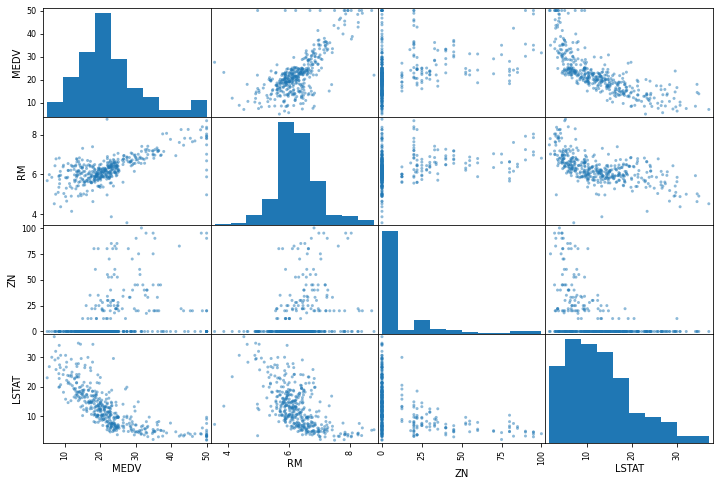

In [31]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))
plt.show()
# We can see that MEDV vs RM is a strong +ve correlation, meaning if RM increases MEDV too increases , same for decreasing
# We can see that MEDV vs LSTAT is a strong -ve correlation, meaning if LSTAT increases MEDV decreases , and alter is for decreasing LSTAT.

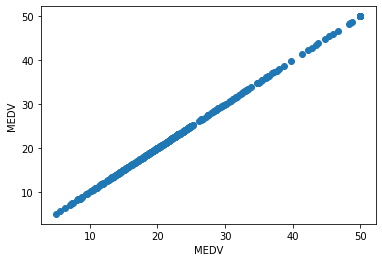

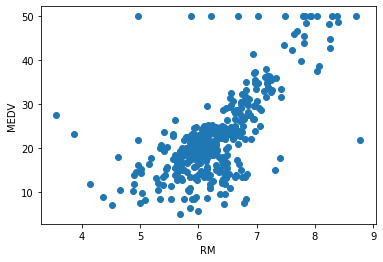

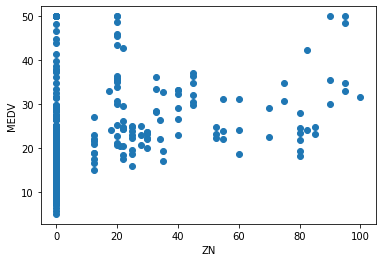

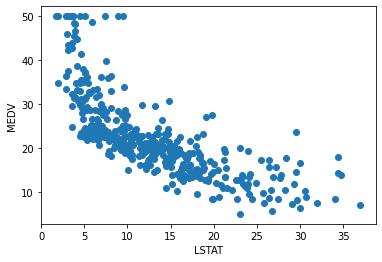

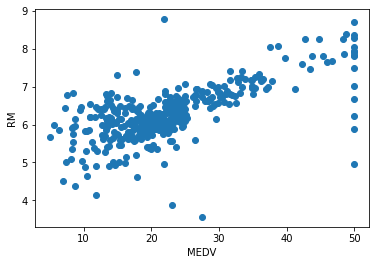

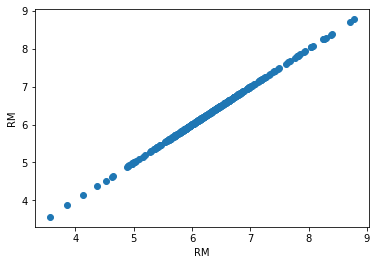

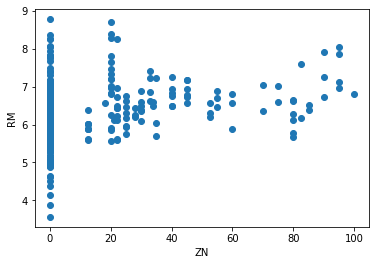

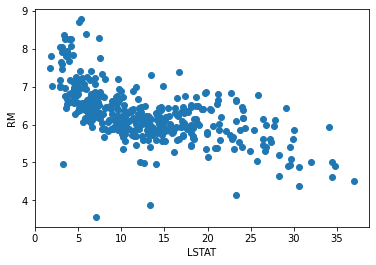

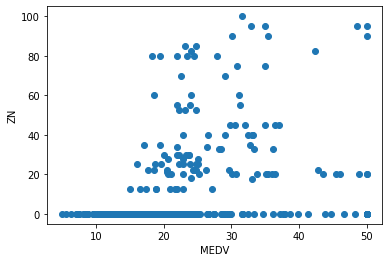

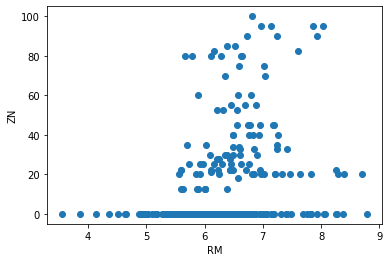

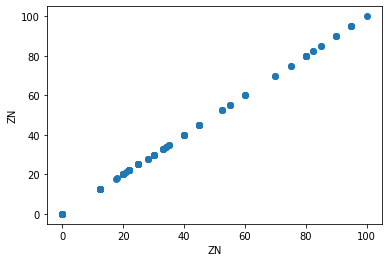

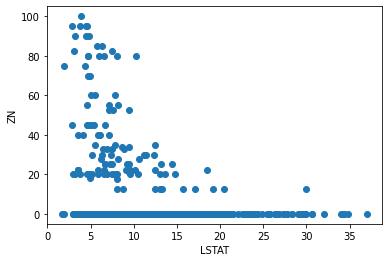

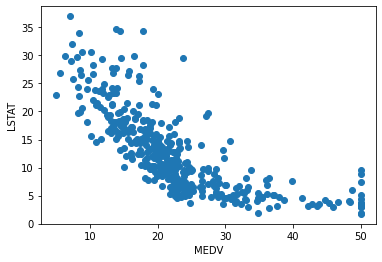

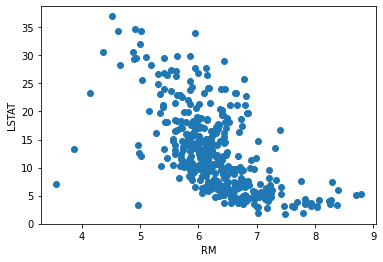

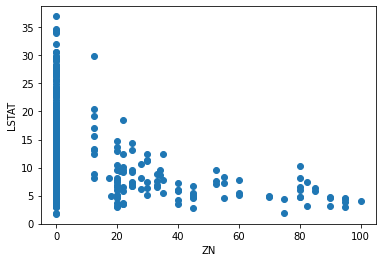

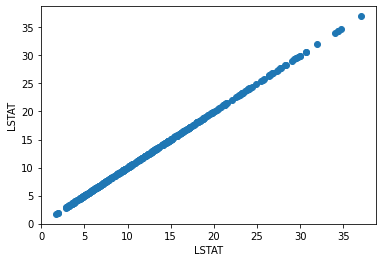

In [32]:

# This is your updated matplotlib method to see graph
attributes = ["MEDV", "RM", "ZN", "LSTAT"]

for i in range(0, 4):
    Y = attributes[i]
    for j in range(0, 4):
        X = attributes[j]
        plt.scatter(housing[X], housing[Y])
        plt.xlabel(X)
        plt.ylabel(Y)
        plt.show()
        

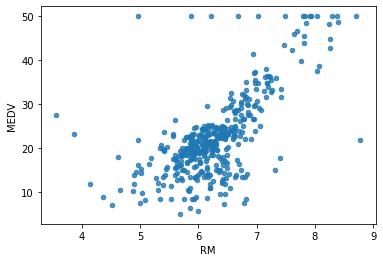

In [33]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha = 0.8)
plt.show()
# This shows strong +ve correlation

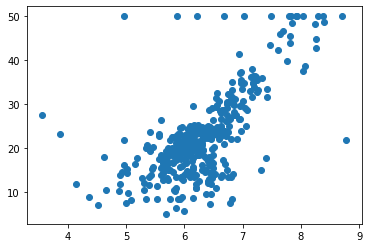

In [34]:
# Another matplotlib method is this
plt.scatter(housing['RM'], housing['MEDV'])
plt.show()
# This shows strong +ve correlation

# Trying out attribute combinations

In [35]:
# Tax per Room is added as an attribute 
housing['TaxRM'] = housing['TAX']/housing['RM']

In [36]:
housing['TaxRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TaxRM, Length: 404, dtype: float64

In [37]:
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
254  0.04819  80.0   3.64     0  0.392  6.108  32.0  9.2203    1  315   
348  0.01501  80.0   2.01     0  0.435  6.635  29.7  8.3440    4  280   
476  4.87141   0.0  18.10     0  0.614  6.484  93.6  2.3053   24  666   
321  0.18159   0.0   7.38     0  0.493  6.376  54.3  4.5404    5  287   
326  0.30347   0.0   7.38     0  0.493  6.312  28.9  5.4159    5  287   

     PATRATIO       B  LSTAT  MEDV       TaxRM  
254      16.4  392.89   6.57  21.9   51.571709  
348      17.0  390.94   5.99  24.5   42.200452  
476      20.2  396.21  18.68  16.7  102.714374  
321      19.6  396.90   6.87  23.1   45.012547  
326      19.6  396.90   6.15  23.0   45.468948

In [38]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV        1.000000
RM          0.679202
B           0.361761
ZN          0.339741
DIS         0.240451
CHAS        0.205066
AGE        -0.364596
RAD        -0.374693
CRIM       -0.393715
NOX        -0.422873
TAX        -0.456657
INDUS      -0.473516
PATRATIO   -0.493534
TaxRM      -0.524864
LSTAT      -0.740494
Name: MEDV, dtype: float64

[]

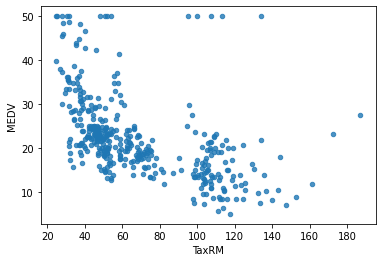

In [39]:
housing.plot(kind="scatter", x="TaxRM", y="MEDV", alpha = 0.8)
plt.plot()

[]

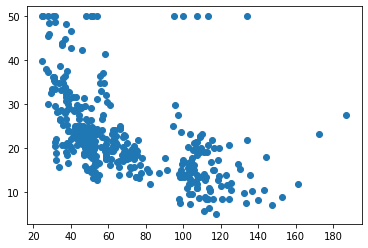

In [40]:
plt.scatter(housing.TaxRM, housing.MEDV)
plt.plot()

In [41]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

# Missing attributes

In [42]:
# To take care of missing values, we have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value (0, mean or median)

In [43]:
# 1 and 2 methods are not good or optimal and is not used
# we use 3rd method

In [44]:
a = housing.dropna(subset=["RM"]) # option 1
a.shape
# Note, that original housing data_frame will remain unchanged

(400, 13)

In [45]:
housing.drop("RM", axis=1) # option 2
# Now, there will be no "RM" column
# Note, that original housing data_frame will remain unchanged

CRIM    ZN  INDUS  CHAS    NOX   AGE     DIS  RAD  TAX  PATRATIO  \
254  0.04819  80.0   3.64     0  0.392  32.0  9.2203    1  315      16.4   
348  0.01501  80.0   2.01     0  0.435  29.7  8.3440    4  280      17.0   
476  4.87141   0.0  18.10     0  0.614  93.6  2.3053   24  666      20.2   
321  0.18159   0.0   7.38     0  0.493  54.3  4.5404    5  287      19.6   
326  0.30347   0.0   7.38     0  0.493  28.9  5.4159    5  287      19.6   
..       ...   ...    ...   ...    ...   ...     ...  ...  ...       ...   
155  3.53501   0.0  19.58     1  0.871  82.6  1.7455    5  403      14.7   
423  7.05042   0.0  18.10     0  0.614  85.1  2.0218   24  666      20.2   
98   0.08187   0.0   2.89     0  0.445  36.9  3.4952    2  276      18.0   
455  4.75237   0.0  18.10     0  0.713  86.5  2.4358   24  666      20.2   
216  0.04560   0.0  13.89     1  0.550  56.0  3.1121    5  276      16.4   

          B  LSTAT  
254  392.89   6.57  
348  390.94   5.99  
476  396.21  18.68  
321  396.90   6.87  
326  396.90   6.15  
..      ...    ...  
155   88.01  15.02  
423    2.52  23.29  
98   393.53   3.57  
455   50.92  18.13  
216  392.80  13.51  

[404 rows x 12 columns]

In [46]:
median = housing["RM"].median() # compute median for option 3

In [47]:
median

6.2135

In [48]:
housing["RM"].fillna(median) # option 3
# Note, that original housing data_frame will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [49]:
# In sklearn, we have a SimpleImputer method which calculates median of all the columns in the dataset,
# If any values are missing from the dataset we can use it directly, we don't have to
# fit values of NA like housing["  "].fillna(median) for all of the missing values in any columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [50]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21350e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [51]:
imputer.statistics_.shape

(13,)

In [52]:
# X is a numpy array, returned from transform function
X = imputer.transform(housing)

In [53]:
housing_tr = pd.DataFrame(X, columns = housing.columns) 

In [54]:
housing_tr.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.602814   10.836634   11.344950    0.069307    0.558064    6.279260   
std      8.099383   22.150636    6.877817    0.254290    0.116875    0.711342   
min      0.006320    0.000000    0.740000    0.000000    0.389000    3.561000   
25%      0.086962    0.000000    5.190000    0.000000    0.453000    5.879750   
50%      0.286735    0.000000    9.900000    0.000000    0.538000    6.213500   
75%      3.731923   12.500000   18.100000    0.000000    0.631000    6.630000   
max     73.534100  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX    PATRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.039851    3.746210    9.735149  412.341584   18.473267  353.392822   
std     28.258248    2.099057    8.731259  168.672623    2.129243   96.069235   
min      2.900000    1.129600    1.000000  187.000000   13.000000    0.320000   
25%     44.850000    2.035975    4.000000  284.000000   17.400000  374.617500   
50%     78.200000    3.122200    5.000000  337.000000   19.000000  390.955000   
75%     94.100000    5.100400   24.000000  666.000000   20.200000  395.630000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  404.000000  
mean    12.791609  
std      7.235740  
min      1.730000  
25%      6.847500  
50%     11.570000  
75%     17.102500  
max     36.980000

# Scikit-learn Design

Primarily, three types of objects

1. Estimators - It estimates some parameter based on a dataset. Eg imputer. It has a fit method ans transform method.Fit method - fits the dataset and calculate internal parameters.

2. Transformers - trandform method takes input and returns output based on learning from fit(). It also has a convenience function called fit_transform() which fits and then transform.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives  score function which will evaluate the predictions.

# Feature scaling

primarily, two types of feature scaling methods:
    
1. Min-MAX scaling (Normalization)
       (value - min)/(max - min)
       Sklearn provides a class called MinMaxScaler for this
2. Standardization
       (value - mean)/std
       Sklearn provides a class called StandardScaler for this

# Creating a pipeline

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    #................ you can add as many as you want in your pipeline
    ('std_scaler',StandardScaler())
])

In [56]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [57]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [58]:
housing_num_tr.shape

(404, 13)

# Selcting a desired model for Dragon Real Estates

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()

# fit() method takes numpy array as an argument
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [60]:
some_data = housing_tr.iloc[:5]

In [61]:
some_labels = housing_labels.iloc[:5]

In [62]:
prepared_data = my_pipeline.transform(some_data)

In [63]:
model.predict(prepared_data)

array([22.651, 25.506, 16.505, 23.341, 23.423])

In [64]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the model

In [65]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
# lin_mse = mean_squared_error(housing_labels, housing_predictions)
mse = mean_squared_error(housing_labels, housing_predictions)
# lin_rmse = np.sqrt(lin_mse)
rmse = np.sqrt(mse)

In [66]:
mse , rmse

(1.367483482673266, 1.1693944940323886)

# Using better evaluation techniques - cross validation techniques

In [67]:
# 1 2 3 4 5 6 7 8 9 10
# 10 group me baat kar, 1 ko neglect kar k model ko check karna usme
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [68]:
rmse_scores

array([2.84057497, 2.75273581, 4.49958974, 2.57399327, 3.61198135,
       2.55733186, 4.60456939, 3.28121557, 3.24977536, 3.25048499])

In [69]:
def printScores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Devaiation: ", scores.std())

In [70]:
printScores(rmse_scores)

Scores:  [2.84057497 2.75273581 4.49958974 2.57399327 3.61198135 2.55733186
 4.60456939 3.28121557 3.24977536 3.25048499]
Mean:  3.3222252303734714
Standard Devaiation:  0.6948271649976788


# Saving the model

In [71]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

# Testing the model on test data

In [72]:
X_test = strat_test_set.drop("MEDV", axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [73]:
final_rmse

2.78456686004111

# Using the model

In [74]:
from joblib import dump, load
import numpy as np
model = load("Dragon.joblib")
features = np.array([[-5.4394, 4.126, -1.616, -0.672, -1.4226, -11.44, -49.34, 7.611, -26, -7.007, -0.97, 0.41, -66.87]])
model.predict(features)

array([28.136])